In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import re
import pytesseract

In [46]:
def img_preprocess(img:np): 
    """Preprocess image to make letters clearer while removing background

    Args:
        img (np): Image file

    Returns:
        img_bin (np): Binary image with clearer letters and removed background
    """
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to increase contrast
    img_eq = cv2.equalizeHist(img_gray)

    # Threshold the image to obtain a binary mask of the black letters
    _, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the binary mask to obtain a mask of the background
    img_bg = cv2.bitwise_not(img_bin)

    # Apply color thresholding to the image to remove the background
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Threshold black color
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([179, 255, 150])
    img_black_mask = cv2.inRange(img_hsv, lower_black, upper_black)

    # Threshold gray color
    lower_gray = np.array([0, 0, 151])
    upper_gray = np.array([179, 30, 255])
    img_gray_mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

    # Combine the black and gray masks
    img_mask = cv2.bitwise_or(img_black_mask, img_gray_mask)

    # Apply the background mask to the color thresholded image
    img_masked = cv2.bitwise_and(img_mask, img_mask, mask=img_bg)

    # Invert the binary mask again to obtain the final binary image
    img_bin_final = cv2.bitwise_not(img_masked)

    # Apply erosion to remove small details and noise from the background
    kernel = np.ones((2, 2), np.uint8)
    img_erode = cv2.erode(img_bin_final, kernel, iterations=1)

    # Apply dilation to make the letters thicker
    # img_dilate = cv2.dilate(img_erode, kernel, iterations=1)

    return img_erode

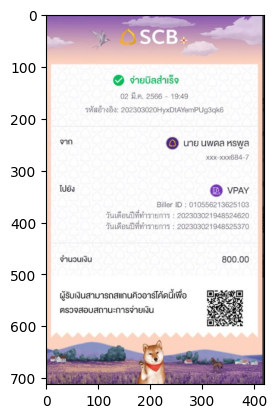

In [55]:
img_scb = plt.imread("img_test/scb/scb_138.jpg")
img_kbank = plt.imread("img_test/kbank/kbank_60.jpg")
img = img_scb
plt.imshow(img)

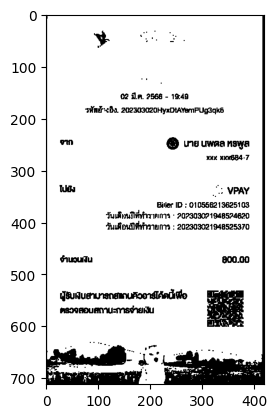

In [56]:
img_bin = img_preprocess(img)
plt.imshow(img_bin, cmap="gray")

In [57]:
# Apply OCR to the preprocessed image
text = pytesseract.image_to_string(img_bin, lang="eng")
# print(text)
# Extract the reference ID and currency values from the text
ref_id, money_amt = [], []
ref_id = [int(x) for x in re.findall(r'20\d{16}', text)]
money_amt = re.findall(r'\b\d{1,3}(?:,\d{3})*\.\d{2}\b', text)
money_amt = [float(f.replace(",", "")) for f in money_amt]

# Print the extracted numbers
print(ref_id)
print(money_amt)

[202303021948525970]
[]
